# Tasks

- Impotiere Daten des Wellenfrontfehlers für das 0 und 10 Grad Feld
- Image Demo Beispiel anschauen
- Bilder des Wellenfrontfehlers darstellen (Achsenbeschriftung nicht vergessen) und Speichern



## Inhalt

### 1. [Einleitung](#Einleitung)

### 2. [Öffnen der .txt Dateien](#open_files)

### 3. [Darstellung des Wellenfrontfehlers](#image)


## 1. Einleitung <a name="Einleitung"></a>

Im Folgenden sollen die aufgenommenen Wellenfrontfehler, die im .txt Format gespeichtert wurden, in dieses jupyter-notebook geladen und anschließend als Abbildung gespeichert werden. Um mit den Daten zu arbeiten, wird die Progammiersprache [python](https://www.python.org/) verwendet. Für die Darstellung benutzen wir die Bibliothek Matplotlib. Numpy ist eine Bibliothek, die Operationen mit multi dimensionalen arrays, sowie Matrizen erlaubt.


- wichtige Bibliotheken für python: 
    - [Numpy](https://www.numpy.org/)
    - [Scipy](https://www.scipy.org/)
    - [Matplotlib](https://matplotlib.org/)

## 2. Öffnen der .txt Dateien <a name="open_files"></a>

- To load the wave front data into a numpy array, we can use the ```loadtxt``` function from the numpy library
- To have accces to the numpy library, we need to import numpy to the jupyter-notebook, `import numpy as np`
- for commands on the operating system, we use the [os-module](https://docs.python.org/2/library/os.html)

In [1]:
import numpy as np # import statement
import os # os module
cwd = os.getcwd() ## get the current working directory
zero_deg_array = np.loadtxt(os.path.join(cwd,
                                         'textfiles', 
                                         '0_deg_wavefront.txt')) # loadtxt funtion, with path to the txt file 


In [2]:
zero_deg_array # wave front error for the zero degree field

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

## 3.  Darstellung des Wellenfrontfehlers <a name="image"></a>

Der Werte des Wellenfrontfehlers sind nun unter der Variablen `zero_deg_array` aufrufbar. Mithilfe des unten angebenen Beispiels, kann nun ein Bild erzeugt werden. Ersetze dazu die Variable `Z` mit `zero_deg_array` in `ax.imshow`. 

In [5]:
figure_folder = "pictures" # folder path for picture
figure_filename = "example.png" # !change figure file name for your wavefront map!

### Example: [Image Demo](https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html)

- Note: Use `%matplotlib inline first


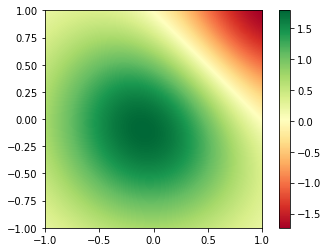

Figure saved in /home/jan/Dokumente/jupyter_notebooks/notebooks/pictures/example.png


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
delta = 0.025
x = y = np.linspace(-1.0, 1.0, zero_deg_array.shape[0]) # x and y coordinates
X, Y = np.meshgrid(x, y) # 
Z1 = np.exp(-X**2 - Y**2) # Gaussian dummy function 1
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2) # Gaussian dummy function 2
Z = (Z1 - Z2) * 2 # final function to show 

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-1, 1, -1, 1])
plt.colorbar(im)
# look in matplotlib examples to add x-and y-labels!
plt.savefig(os.path.join(cwd, figure_folder, figure_filename), 
            format='png') # savefig saves the image in the pictures folder

plt.show()
print("Figure saved in {0:20s}".format(os.path.join(cwd, figure_folder, figure_filename)))

## 4. Reihenentwicklung <a name="wavefrontexpansion"></a>

In [13]:
def wavefront_on_axis(w000, w020, w040, pupil_sampling=128):
    """
    wavefront expansion for the on axis field
    
    Parameters
    ----------
    w000 : float
        Piston
    w020 : float
        Focus
    w040 : float
        spherical Aberration
    pupil_sampling : int
        grid size of the sampled pupil 
    Returns
    -------
    
    """
    x = np.linspace(-1, 1, pupil_sampling)
    y = np.linspace(-1, 1, pupil_sampling)
    X, Y = np.meshgrid(x, y, sparse=True, indexing='ij')
    
    return w000 + w020 * (X**2 + Y**2) + w040 * (X**2 + Y**2)**2
    
    

In [29]:
w_0 = wavefront_on_axis(w000=0., w020=-30., w040=20.)

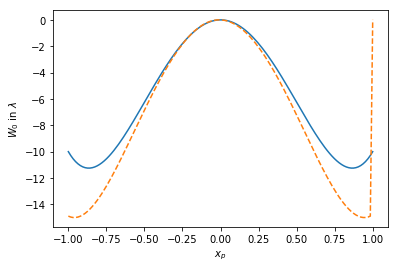

In [30]:
%matplotlib inline
plt.figure()
plt.plot(x, w_0[:, w_0.shape[0]//2])
plt.plot(x, zero_deg_array[:, w_0.shape[0]//2], '--')
plt.xlabel('$x_p$')
plt.ylabel('$W_0$ in $\lambda$')
plt.show()

In [ ]:
# def wavefront_10_deg(pupil_sampling=128):